In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from numpy.random import seed

In [2]:
seed(1)
tf.random.set_seed(2)

In [3]:
aapl_dataset_fp = 'dataset/ta_tsla_1.5y.csv'
class_names = ['LOW', 'HIGH']

In [4]:
aapl_dataset = pd.read_csv(aapl_dataset_fp)
aapl_dataset

,roc,rsi,stoch,roc_close_ema_w8,roc_ema_w8_ema_w20,roc_close_ema_w20,roc_close_sma_w9,roc_sma_w9_sma_w26,roc_close_sma_w26,trend
0,27.581690,49.779482,90.534511,7.806122,-3.853406,3.651914,7.977112,-6.415359,1.049992,HIGH
1,26.376379,50.257685,89.540447,6.470676,-2.441565,3.871125,8.156230,-4.653537,3.123140,HIGH
2,13.465345,53.645385,98.676206,8.468114,-0.820203,7.578455,11.485828,-2.181634,9.053615,HIGH
3,20.713959,62.515591,99.489319,17.176606,2.137574,19.681342,22.704484,1.512246,24.560079,HIGH
4,34.408126,67.568949,89.173533,20.354723,5.381429,26.831527,28.800038,5.414769,35.774263,HIGH
...,...,...,...,...,...,...,...,...,...,...
301,-1.170067,50.268135,70.498626,1.375798,-0.394744,0.975624,1.525234,1.285042,2.829876,HIGH
302,3.006016,52.268296,83.237477,1.917547,-0.043512,1.873201,2.289846,1.404542,3.726550,HIGH
303,8.377555,51.444764,82.449742,1.172097,0.152341,1.326223,1.563590,1.404378,2.989927,HIGH
304,4.116524,52.383046,87.236185,1.272028,0.345993,1.622422,1.574452,1.643590,3.243919,HIGH


In [5]:
feature_names = aapl_dataset.columns[:-1]
label_name = aapl_dataset.columns[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: Index(['roc', 'rsi', 'stoch', 'roc_close_ema_w8', 'roc_ema_w8_ema_w20',
       'roc_close_ema_w20', 'roc_close_sma_w9', 'roc_sma_w9_sma_w26',
       'roc_close_sma_w26'],
      dtype='object')
Label: trend


In [6]:
aapl_dataset[label_name] = aapl_dataset[label_name].map({'LOW': 0, 'HIGH': 1})
features = aapl_dataset.copy()
labels = features.pop(label_name)
features = tf.keras.utils.normalize(features, axis=-2, order=2)

features 

,roc,rsi,stoch,roc_close_ema_w8,roc_ema_w8_ema_w20,roc_close_ema_w20,roc_close_sma_w9,roc_sma_w9_sma_w26,roc_close_sma_w26
0,0.080139,0.048347,0.075589,0.075569,-0.037789,0.018967,0.059310,-0.035766,0.003821
1,0.076637,0.048811,0.074759,0.062641,-0.023943,0.020105,0.060642,-0.025944,0.011365
2,0.039124,0.052101,0.082386,0.081977,-0.008043,0.039360,0.085397,-0.012163,0.032946
3,0.060185,0.060716,0.083065,0.166282,0.020962,0.102218,0.168808,0.008431,0.089375
4,0.099973,0.065624,0.074452,0.197048,0.052774,0.139354,0.214128,0.030188,0.130184
...,...,...,...,...,...,...,...,...,...
301,-0.003400,0.048821,0.058860,0.013319,-0.003871,0.005067,0.011340,0.007164,0.010298
302,0.008734,0.050764,0.069496,0.018563,-0.000427,0.009729,0.017025,0.007830,0.013561
303,0.024341,0.049964,0.068838,0.011347,0.001494,0.006888,0.011625,0.007829,0.010880
304,0.011961,0.050875,0.072835,0.012314,0.003393,0.008426,0.011706,0.009163,0.011805


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(9,)),
    tf.keras.layers.Dense(15, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(2)
])
 
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

TEST_PERC = 0.2
VALID_PERC = 0.2

In [9]:
class0_dataset = dataset.filter(lambda x, y: y == 0)
class1_dataset = dataset.filter(lambda x, y: y == 1)

print(class0_dataset.cardinality())

DATASIZE = dataset.cardinality().numpy()
c0_size = len(list(class0_dataset))
c1_size = len(list(class1_dataset))

print(DATASIZE,c0_size,c1_size)
 
class0_dataset = class0_dataset.shuffle(DATASIZE)
class1_dataset = class1_dataset.shuffle(DATASIZE)
 
class0_test = class0_dataset.take(int(c0_size*TEST_PERC))
rest = class0_dataset.skip(int(c0_size*TEST_PERC))
class0_validation = rest.take(int(c0_size*VALID_PERC))
class0_train = rest.skip(int(c0_size*VALID_PERC))
 
class1_test = class1_dataset.take(int(c1_size*TEST_PERC))
rest = class1_dataset.skip(int(c1_size*TEST_PERC))
class1_validation = rest.take(int(c1_size*VALID_PERC))
class1_train = rest.skip(int(c1_size*VALID_PERC))

train_dataset = class0_train.concatenate(class1_train).shuffle(DATASIZE)
test_dataset = class0_test.concatenate(class1_test).shuffle(DATASIZE)
validation_dataset = class0_validation.concatenate(class1_validation).shuffle(DATASIZE)

print('Train dataset size = ', len(list(train_dataset)))
print('Validation dataset size = ', len(list(validation_dataset)))
print('Test dataset size = ', len(list(test_dataset)))

tf.Tensor(-2, shape=(), dtype=int64)
306 81 225
Train dataset size =  184
Validation dataset size =  61
Test dataset size =  61


In [10]:
feat,lab = map(list,zip(*list(train_dataset.as_numpy_iterator())))
train_features= pd.DataFrame(data=feat,columns=feature_names)
train_labels = pd.DataFrame(data=lab,columns=[label_name])
 
feat,lab = map(list,zip(*list(validation_dataset.as_numpy_iterator())))
valid_features= pd.DataFrame(data=feat,columns=feature_names)
valid_labels = pd.DataFrame(data=lab,columns=[label_name])
 
feat,lab = map(list,zip(*list(test_dataset.as_numpy_iterator())))
test_features= pd.DataFrame(data=feat,columns=feature_names)
test_labels = pd.DataFrame(data=lab,columns=[label_name])

history = model.fit(train_features, train_labels, epochs=1000,validation_data=(valid_features,valid_labels))
print(history)

Epoch 1/1000
6/6 [==============================] - 1s 31ms/step - loss: 0.6571 - sparse_categorical_accuracy: 0.7011 - val_loss: 0.5833 - val_sparse_categorical_accuracy: 0.7377
Epoch 2/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.5744 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.5747 - val_sparse_categorical_accuracy: 0.7377
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5799 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.5703 - val_sparse_categorical_accuracy: 0.7377
Epoch 4/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.5741 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.5679 - val_sparse_categorical_accuracy: 0.7377
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5720 - sparse_categorical_accuracy: 0.7337 - val_loss: 0.5670 - val_sparse_categorical_accuracy: 0.7377
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.5733 - sparse_categorical_accuracy:

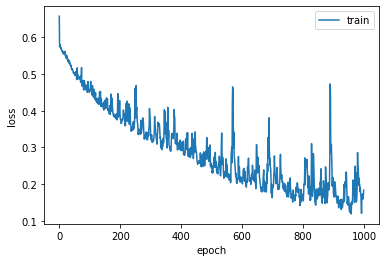

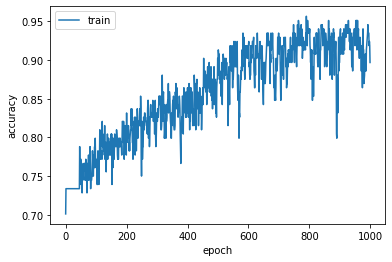

In [11]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()
 
plt.plot(history.history['sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'])
plt.show()

2/2 [==============================] - 0s 2ms/step - loss: 0.6794 - sparse_categorical_accuracy: 0.9016
Teste:
 [0.6794227957725525, 0.9016393423080444]


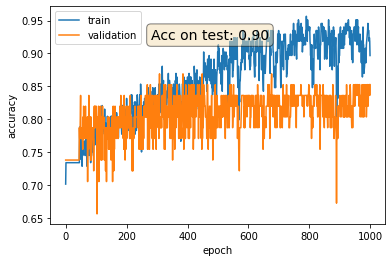

In [12]:
test = model.evaluate(test_features,test_labels)
print("Teste:\n",test)
loss,acc = test

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.3, 0.90, "Acc on test: %.2f" % acc,  fontsize=14, transform=plt.axes().transAxes, 
        verticalalignment='top', bbox=props)
 
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'])
 
plt.show()

In [13]:
with open('models/tsla_18m_model.json', 'w') as json_file:
    json_file.write(model.to_json())

model.save_weights('models/tsla_18m_weights.h5')